In [4]:
import pandas as pd, numpy as np, os
from get_draws.api import get_draws
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [5]:
output_dir ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v6.2.1_zinc_supplementation/ciff_sam/2022_02_24_16_27_32/count_data/'

In [6]:
figname = 'model_6.2.1'

In [7]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'diarrhea_transition_count.csv',
 'wasting_transition_count.csv',
 'diarrhea_state_person_time.hdf',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'diarrhea_state_person_time.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'diarrhea_transition_count.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

# maternal bmi

In [8]:
births = pd.read_csv(output_dir +'births.csv')
birth_count = births.loc[births.measure=='total_births']
bw_sum = births.loc[births.measure=='birth_weight_sum']
lbw_sum = births.loc[births.measure=='low_weight_births']
birth_count.head()

,Unnamed: 0,sex,year,measure,input_draw,scenario,value,insecticide_treated_nets,maternal_supplementation,maternal_malnutrition
1920,1920,female,2022,total_births,29,baseline,0.0,covered,bep,cat2
1921,1921,female,2022,total_births,29,baseline,0.0,uncovered,bep,cat2
1922,1922,female,2022,total_births,29,baseline,0.0,covered,mmn,cat2
1923,1923,female,2022,total_births,29,baseline,0.0,uncovered,mmn,cat2
1924,1924,female,2022,total_births,29,baseline,1338.0,covered,ifa,cat2


## check exposure

proportion of babies born to each maternal BMI category
- validation target is 0.224 (95% CI: 0.217, 0.231) for cat1

In [9]:
cols = ['input_draw','scenario','maternal_malnutrition']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_malnutrition']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value']

count      mean       std  \
scenario             maternal_malnutrition                              
baseline             cat1                    12.0  0.224464  0.004158   
                     cat2                    12.0  0.775536  0.004158   
lbwsg_interventions  cat1                    12.0  0.224464  0.004158   
                     cat2                    12.0  0.775536  0.004158   
sqlns                cat1                    12.0  0.224464  0.004158   
                     cat2                    12.0  0.775536  0.004158   
wasting_treatment    cat1                    12.0  0.224464  0.004158   
                     cat2                    12.0  0.775536  0.004158   
zinc_supplementation cat1                    12.0  0.224464  0.004158   
                     cat2                    12.0  0.775536  0.004158   

                                                 min      2.5%       50%  \
scenario             maternal_malnutrition                                 
baseline             cat1                   0.219221  0.219330  0.224021   
                     cat2                   0.768519  0.768876  0.775979   
lbwsg_interventions  cat1                   0.219221  0.219330  0.224021   
                     cat2                   0.768519  0.768876  0.775979   
sqlns                cat1                   0.219221  0.219330  0.224021   
                     cat2                   0.768519  0.768876  0.775979   
wasting_treatment    cat1                   0.219221  0.219330  0.224021   
                     cat2                   0.768519  0.768876  0.775979   
zinc_supplementation cat1                   0.219221  0.219330  0.224021   
                     cat2                   0.768519  0.768876  0.775979   

                                               97.5%       max  
scenario             maternal_malnutrition                      
baseline             cat1                   0.231124  0.231481  
                     cat2                   0.780670  0.780779  
lbwsg_interventions  cat1                   0.231124  0.231481  
                     cat2                   0.780670  0.780779  
sqlns                cat1                   0.231124  0.231481  
                     cat2                   0.780670  0.780779  
wasting_treatment    cat1                   0.231124  0.231481  
                     cat2                   0.780670  0.780779  
zinc_supplementation cat1                   0.231124  0.231481  
                     cat2                   0.780670  0.780779

In [10]:
# check it does not vary by sex
cols = ['input_draw','scenario','sex','maternal_malnutrition']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_malnutrition']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value']

# looks good

count      mean       std  \
scenario             sex    maternal_malnutrition                              
baseline             female cat1                    12.0  0.224577  0.003829   
                            cat2                    12.0  0.775423  0.003829   
                     male   cat1                    12.0  0.224359  0.004649   
                            cat2                    12.0  0.775641  0.004649   
lbwsg_interventions  female cat1                    12.0  0.224577  0.003829   
                            cat2                    12.0  0.775423  0.003829   
                     male   cat1                    12.0  0.224359  0.004649   
                            cat2                    12.0  0.775641  0.004649   
sqlns                female cat1                    12.0  0.224577  0.003829   
                            cat2                    12.0  0.775423  0.003829   
                     male   cat1                    12.0  0.224359  0.004649   
                            cat2                    12.0  0.775641  0.004649   
wasting_treatment    female cat1                    12.0  0.224577  0.003829   
                            cat2                    12.0  0.775423  0.003829   
                     male   cat1                    12.0  0.224359  0.004649   
                            cat2                    12.0  0.775641  0.004649   
zinc_supplementation female cat1                    12.0  0.224577  0.003829   
                            cat2                    12.0  0.775423  0.003829   
                     male   cat1                    12.0  0.224359  0.004649   
                            cat2                    12.0  0.775641  0.004649   

                                                        min      2.5%  \
scenario             sex    maternal_malnutrition                       
baseline             female cat1                   0.218515  0.218656   
                            cat2                   0.770166  0.770189   
                     male   cat1                   0.218841  0.219129   
                            cat2                   0.766955  0.767628   
lbwsg_interventions  female cat1                   0.218515  0.218656   
                            cat2                   0.770166  0.770189   
                     male   cat1                   0.218841  0.219129   
                            cat2                   0.766955  0.767628   
sqlns                female cat1                   0.218515  0.218656   
                            cat2                   0.770166  0.770189   
                     male   cat1                   0.218841  0.219129   
                            cat2                   0.766955  0.767628   
wasting_treatment    female cat1                   0.218515  0.218656   
                            cat2                   0.770166  0.770189   
                     male   cat1                   0.218841  0.219129   
                            cat2                   0.766955  0.767628   
zinc_supplementation female cat1                   0.218515  0.218656   
                            cat2                   0.770166  0.770189   
                     male   cat1                   0.218841  0.219129   
                            cat2                   0.766955  0.767628   

                                                        50%     97.5%  \
scenario             sex    maternal_malnutrition                       
baseline             female cat1                   0.224041  0.229811   
                            cat2                   0.775959  0.781344   
                     male   cat1                   0.223593  0.232372   
                            cat2                   0.776407  0.780871   
lbwsg_interventions  female cat1                   0.224041  0.229811   
                            cat2                   0.775959  0.781344   
                     male   cat1                   0.223593  0.232372   
                          

In [11]:
# check it does not vary by year
cols = ['input_draw','scenario','year','maternal_malnutrition']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_malnutrition']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value'].head(12)

# looks good

count      mean       std  \
scenario            year maternal_malnutrition                              
baseline            2022 cat1                    12.0  0.222994  0.007100   
                         cat2                    12.0  0.777006  0.007100   
                    2023 cat1                    12.0  0.223653  0.003930   
                         cat2                    12.0  0.776347  0.003930   
                    2024 cat1                    12.0  0.224663  0.004156   
                         cat2                    12.0  0.775337  0.004156   
                    2025 cat1                    12.0  0.225067  0.004543   
                         cat2                    12.0  0.774933  0.004543   
                    2026 cat1                    12.0  0.225949  0.004880   
                         cat2                    12.0  0.774051  0.004880   
lbwsg_interventions 2022 cat1                    12.0  0.222994  0.007100   
                         cat2                    12.0  0.777006  0.007100   

                                                     min      2.5%       50%  \
scenario            year maternal_malnutrition                                 
baseline            2022 cat1                   0.214559  0.214765  0.220914   
                         cat2                   0.765235  0.765561  0.779086   
                    2023 cat1                   0.219016  0.219028  0.222561   
                         cat2                   0.769748  0.770170  0.777439   
                    2024 cat1                   0.216975  0.217637  0.224015   
                         cat2                   0.769547  0.769639  0.775985   
                    2025 cat1                   0.219542  0.219720  0.224364   
                         cat2                   0.764576  0.766140  0.775636   
                    2026 cat1                   0.218948  0.219126  0.224814   
                         cat2                   0.765051  0.765831  0.775186   
lbwsg_interventions 2022 cat1                   0.214559  0.214765  0.220914   
                         cat2                   0.765235  0.765561  0.779086   

                                                   97.5%       max  
scenario            year maternal_malnutrition                      
baseline            2022 cat1                   0.234439  0.234765  
                         cat2                   0.785235  0.785441  
                    2023 cat1                   0.229830  0.230252  
                         cat2                   0.780972  0.780984  
                    2024 cat1                   0.230361  0.230453  
                         cat2                   0.782363  0.783025  
                    2025 cat1                   0.233860  0.235424  
                         cat2                   0.780280  0.780458  
                    2026 cat1                   0.234169  0.234949  
                         cat2                   0.780874  0.781052  
lbwsg_interventions 2022 cat1                   0.234439  0.234765  
                         cat2                   0.785235  0.785441

## Birthweight difference by maternal bmi strata

validation target is -138.46 (95% CI: -174.68, -102.25) for cat1 relative to cat2

In [12]:
((bw_sum.groupby(['input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())
 .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))['value']

count         mean        std  \
scenario             maternal_malnutrition                                  
baseline             cat1                    12.0  3098.137690  29.984739   
                     cat2                    12.0  3232.465521  20.306220   
lbwsg_interventions  cat1                    12.0  3162.440253  34.765419   
                     cat2                    12.0  3262.685127  20.815219   
sqlns                cat1                    12.0  3098.137690  29.984739   
                     cat2                    12.0  3232.465521  20.306220   
wasting_treatment    cat1                    12.0  3098.137690  29.984739   
                     cat2                    12.0  3232.465521  20.306220   
zinc_supplementation cat1                    12.0  3162.440253  34.765419   
                     cat2                    12.0  3262.685127  20.815219   

                                                    min         2.5%  \
scenario             maternal_malnutrition                             
baseline             cat1                   3049.759298  3050.778970   
                     cat2                   3193.051608  3199.562286   
lbwsg_interventions  cat1                   3089.905847  3102.528475   
                     cat2                   3223.260798  3230.207295   
sqlns                cat1                   3049.759298  3050.778970   
                     cat2                   3193.051608  3199.562286   
wasting_treatment    cat1                   3049.759298  3050.778970   
                     cat2                   3193.051608  3199.562286   
zinc_supplementation cat1                   3089.905847  3102.528475   
                     cat2                   3223.260798  3230.207295   

                                                    50%        97.5%  \
scenario             maternal_malnutrition                             
baseline             cat1                   3102.986957  3149.785853   
                     cat2                   3233.726738  3268.915177   
lbwsg_interventions  cat1                   3156.064742  3210.646094   
                     cat2                   3259.109264  3299.589318   
sqlns                cat1                   3102.986957  3149.785853   
                     cat2                   3233.726738  3268.915177   
wasting_treatment    cat1                   3102.986957  3149.785853   
                     cat2                   3233.726738  3268.915177   
zinc_supplementation cat1                   3156.064742  3210.646094   
                     cat2                   3259.109264  3299.589318   

                                                    max  
scenario             maternal_malnutrition               
baseline             cat1                   3157.251516  
                     cat2                   3274.929198  
lbwsg_interventions  cat1                   3216.240896  
                     cat2                   3303.833960  
sqlns                cat1                   3157.251516  
                     cat2                   3274.929198  
wasting_treatment    cat1                   3157.251516  
                     cat2                   3274.929198  
zinc_supplementation cat1                   3216.240896  
                     cat2                   3303.833960

In [13]:
data = (bw_sum.groupby(['input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())[['value']].reset_index()
diff = (data.loc[data.maternal_malnutrition=='cat1'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario']) 
        - data.loc[data.maternal_malnutrition=='cat2'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario']))
diff = diff.groupby(['scenario']).describe(percentiles=[0.025,0.975])
diff
# looks good, except for lbwsg scenario, which should be explained by BEP coverage

value                                                 \
                     count        mean        std         min        2.5%   
scenario                                                                    
baseline              12.0 -134.327832  17.862053 -167.402291 -162.649031   
lbwsg_interventions   12.0 -100.244874  25.894241 -159.364497 -148.833377   
sqlns                 12.0 -134.327832  17.862053 -167.402291 -162.649031   
wasting_treatment     12.0 -134.327832  17.862053 -167.402291 -162.649031   
zinc_supplementation  12.0 -100.244874  25.894241 -159.364497 -148.833377   

                                                          
                             50%       97.5%         max  
scenario                                                  
baseline             -137.105514 -106.889182 -105.998359  
lbwsg_interventions   -97.829913  -67.998572  -67.365588  
sqlns                -137.105514 -106.889182 -105.998359  
wasting_treatment    -137.105514 -106.889182 -105.998359  
zinc_supplementation  -97.829913  -67.998572  -67.365588

In [14]:
# confirm this is the case...
data = (bw_sum.groupby(['input_draw','scenario','maternal_malnutrition','maternal_supplementation']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition','maternal_supplementation']).sum())[['value']].reset_index()
diff = (data.loc[data.maternal_malnutrition=='cat1'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario','maternal_supplementation']) 
        - data.loc[data.maternal_malnutrition=='cat2'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario','maternal_supplementation']))
diff = diff.groupby(['scenario','maternal_supplementation']).describe(percentiles=[0.025,0.975])
diff.dropna()
# looks good!

value                         \
                                              count        mean        std   
scenario             maternal_supplementation                                
baseline             ifa                       12.0 -132.817474  20.228468   
                     uncovered                 12.0 -136.285167  16.867595   
lbwsg_interventions  ifa                       12.0 -130.089767  21.922854   
                     uncovered                 12.0 -134.676489  19.411945   
sqlns                ifa                       12.0 -132.817474  20.228468   
                     uncovered                 12.0 -136.285167  16.867595   
wasting_treatment    ifa                       12.0 -132.817474  20.228468   
                     uncovered                 12.0 -136.285167  16.867595   
zinc_supplementation ifa                       12.0 -130.089767  21.922854   
                     uncovered                 12.0 -134.676489  19.411945   

                                                                       \
                                                      min        2.5%   
scenario             maternal_supplementation                           
baseline             ifa                      -171.080334 -165.944717   
                     uncovered                -162.034575 -160.922299   
lbwsg_interventions  ifa                      -174.996940 -168.749775   
                     uncovered                -162.607711 -161.526279   
sqlns                ifa                      -171.080334 -165.944717   
                     uncovered                -162.034575 -160.922299   
wasting_treatment    ifa                      -171.080334 -165.944717   
                     uncovered                -162.034575 -160.922299   
zinc_supplementation ifa                      -174.996940 -168.749775   
                     uncovered                -162.607711 -161.526279   

                                                                       \
                                                      50%       97.5%   
scenario             maternal_supplementation                           
baseline             ifa                      -134.337381 -100.663513   
                     uncovered                -137.129570 -115.356141   
lbwsg_interventions  ifa                      -130.143474  -96.862209   
                     uncovered                -138.903914 -107.492672   
sqlns                ifa                      -134.337381 -100.663513   
                     uncovered                -137.129570 -115.356141   
wasting_treatment    ifa                      -134.337381 -100.663513   
                     uncovered                -137.129570 -115.356141   
zinc_supplementation ifa                      -130.143474  -96.862209   
                     uncovered                -138.903914 -107.492672   

                                                           
                                                      max  
scenario             maternal_supplementation              
baseline             ifa                       -99.493947  
                     uncovered                -114.774393  
lbwsg_interventions  ifa                       -92.786735  
                     uncovered                -106.746529  
sqlns                ifa                       -99.493947  
                     uncovered                -114.774393  
wasting_treatment    ifa                       -99.493947  
                     uncovered                -114.774393  
zinc_supplementation ifa                       -92.786735  
                     uncovered                -106.746529

## Check proportion low birth weight

This does not have a specific verification target, but is good to check and can be compared to other external literature sources for validation

In [15]:
((lbw_sum.groupby(['input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())
 .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))['value']

count      mean       std  \
scenario             maternal_malnutrition                              
baseline             cat1                    12.0  0.143017  0.008772   
                     cat2                    12.0  0.097100  0.003564   
lbwsg_interventions  cat1                    12.0  0.122962  0.007927   
                     cat2                    12.0  0.093757  0.003327   
sqlns                cat1                    12.0  0.143017  0.008772   
                     cat2                    12.0  0.097100  0.003564   
wasting_treatment    cat1                    12.0  0.143017  0.008772   
                     cat2                    12.0  0.097100  0.003564   
zinc_supplementation cat1                    12.0  0.122962  0.007927   
                     cat2                    12.0  0.093757  0.003327   

                                                 min      2.5%       50%  \
scenario             maternal_malnutrition                                 
baseline             cat1                   0.126641  0.128438  0.142838   
                     cat2                   0.089901  0.090948  0.097958   
lbwsg_interventions  cat1                   0.112156  0.112819  0.123231   
                     cat2                   0.087989  0.088722  0.093691   
sqlns                cat1                   0.126641  0.128438  0.142838   
                     cat2                   0.089901  0.090948  0.097958   
wasting_treatment    cat1                   0.126641  0.128438  0.142838   
                     cat2                   0.089901  0.090948  0.097958   
zinc_supplementation cat1                   0.112156  0.112819  0.123231   
                     cat2                   0.087989  0.088722  0.093691   

                                               97.5%       max  
scenario             maternal_malnutrition                      
baseline             cat1                   0.156114  0.156849  
                     cat2                   0.101563  0.101781  
lbwsg_interventions  cat1                   0.138069  0.141675  
                     cat2                   0.098407  0.098764  
sqlns                cat1                   0.156114  0.156849  
                     cat2                   0.101563  0.101781  
wasting_treatment    cat1                   0.156114  0.156849  
                     cat2                   0.101563  0.101781  
zinc_supplementation cat1                   0.138069  0.141675  
                     cat2                   0.098407  0.098764

In [16]:
data = (lbw_sum.groupby(['input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())[['value']].reset_index()
rr = (data.loc[data.maternal_malnutrition=='cat1'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario']) 
        / data.loc[data.maternal_malnutrition=='cat2'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario']))
rr = rr.groupby(['scenario']).describe(percentiles=[0.025,0.975])
rr

value                                                    \
                     count      mean       std       min      2.5%       50%   
scenario                                                                       
baseline              12.0  1.472609  0.066003  1.351406  1.363752  1.497851   
lbwsg_interventions   12.0  1.311069  0.060996  1.236716  1.242404  1.301888   
sqlns                 12.0  1.472609  0.066003  1.351406  1.363752  1.497851   
wasting_treatment     12.0  1.472609  0.066003  1.351406  1.363752  1.497851   
zinc_supplementation  12.0  1.311069  0.060996  1.236716  1.242404  1.301888   

                                          
                         97.5%       max  
scenario                                  
baseline              1.561223  1.574061  
lbwsg_interventions   1.437237  1.470003  
sqlns                 1.561223  1.574061  
wasting_treatment     1.561223  1.574061  
zinc_supplementation  1.437237  1.470003

In [52]:
disease_pt = pd.read_csv(output_dir +'disease_state_person_time.csv')
disease_pt.cause.unique()

array(['lower_respiratory_infections', 'measles',
       'susceptible_to_lower_respiratory_infections',
       'susceptible_to_measles'], dtype=object)

In [54]:
dd_pt = pd.read_csv(output_dir + 'diarrhea_state_person_time.csv')

In [56]:
cols = ['input_draw','scenario','sex','age']

wasting_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv').groupby(cols).sum()[['value']]
stunting_pt = pd.read_csv(output_dir +'stunting_state_person_time.csv').groupby(cols).sum()[['value']]
disease_pt = pd.read_csv(output_dir +'disease_state_person_time.csv')
dd_pt = pd.read_csv(output_dir + 'diarrhea_state_person_time.csv')
disease_pt = pd.concat([disease_pt,dd_pt])

disease_pt['cause'] = disease_pt.cause.str.replace('susceptible_to_','')
disease_pt = disease_pt.groupby(cols+['cause']).sum()[['value']].reset_index()
disease_pt['value'] = disease_pt['value'].round(0)
stunting_pt['value'] = stunting_pt['value'].round(0)
wasting_pt['value'] = wasting_pt['value'].round(0)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='lower_respiratory_infections'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='measles'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == wasting_pt)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == stunting_pt)

# Wasting and stunting exposures

In [25]:
state_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv')
state_pt.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,diarrhea,x_factor,sq_lns,mam_treatment,sam_treatment,age
0,0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,cat2,covered,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,cat2,covered,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,cat1,covered,covered,covered,early_neonatal
3,3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,cat1,covered,covered,covered,early_neonatal
4,4,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,cat2,covered,uncovered,covered,early_neonatal


In [26]:
groupby_cols = ['input_draw','sex','age','cause']

def calculate_child_growth_exposure_prevalence(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(groupby_cols).sum()[['value']].reset_index()
    if risk=='wasting':
        state_pt_exposed = state_pt.loc[state_pt.cause.str.contains('acute_malnutrition')]
        state_pt_exposed['cause'] = 'wasted'
    else:
        state_pt_exposed = state_pt.loc[state_pt.cause.isin(['cat1','cat2'])]
        state_pt_exposed['cause'] = 'stunted'
    state_pt_with_exposed = (pd.concat([state_pt, 
                          state_pt_exposed.groupby(groupby_cols).sum().reset_index()],
                         ignore_index=True)
                .set_index(groupby_cols))
    prev = state_pt_with_exposed / state_pt.groupby([c for c in groupby_cols if c != 'cause']).sum()
    prev = prev.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975]).sort_index()
    return prev

In [27]:
pd.read_csv(output_dir +'wasting_state_person_time.csv')

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,diarrhea,x_factor,sq_lns,mam_treatment,sam_treatment,age
0,0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat2,cat2,covered,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat1,cat2,covered,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat2,cat1,covered,covered,covered,early_neonatal
3,3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat1,cat1,covered,covered,covered,early_neonatal
4,4,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat2,cat2,covered,uncovered,covered,early_neonatal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460795,460795,male,2026,susceptible_to_child_wasting,state_person_time,946,zinc_supplementation,3.296372,cat1,cat1,uncovered,covered,uncovered,2_to_4
460796,460796,male,2026,susceptible_to_child_wasting,state_person_time,946,zinc_supplementation,102.580424,cat2,cat2,uncovered,uncovered,uncovered,2_to_4
460797,460797,male,2026,susceptible_to_child_wasting,state_person_time,946,zinc_supplementation,1.409993,cat1,cat2,uncovered,uncovered,uncovered,2_to_4
460798,460798,male,2026,susceptible_to_child_wasting,state_person_time,946,zinc_supplementation,96.172485,cat2,cat1,uncovered,uncovered,uncovered,2_to_4


In [28]:
state_pt = pd.read_csv(output_dir +f'wasting_state_person_time.csv')
state_pt = state_pt.groupby(['scenario','input_draw','sex','age','cause']).sum()[['value']]
state_pt_tot = state_pt.groupby(['scenario','input_draw','sex','age']).sum()
prev = state_pt / state_pt_tot
prev.groupby(['scenario','sex','age','cause']).describe(percentiles=[0.025,0.975])

value  \
                                                                         count   
scenario             sex    age             cause                                
baseline             female 1-5_months      mild_child_wasting            12.0   
                                            moderate_acute_malnutrition   12.0   
                                            severe_acute_malnutrition     12.0   
                                            susceptible_to_child_wasting  12.0   
                            12_to_23_months mild_child_wasting            12.0   
...                                                                        ...   
zinc_supplementation male   early_neonatal  susceptible_to_child_wasting  12.0   
                            late_neonatal   mild_child_wasting            12.0   
                                            moderate_acute_malnutrition   12.0   
                                            severe_acute_malnutrition     12.0   
                                            susceptible_to_child_wasting  12.0   

                                                                                    \
                                                                              mean   
scenario             sex    age             cause                                    
baseline             female 1-5_months      mild_child_wasting            0.200908   
                                            moderate_acute_malnutrition   0.080038   
                                            severe_acute_malnutrition     0.022705   
                                            susceptible_to_child_wasting  0.696349   
                            12_to_23_months mild_child_wasting            0.207187   
...                                                                            ...   
zinc_supplementation male   early_neonatal  susceptible_to_child_wasting  0.660178   
                            late_neonatal   mild_child_wasting            0.206958   
                                            moderate_acute_malnutrition   0.095403   
                                            severe_acute_malnutrition     0.037438   
                                            susceptible_to_child_wasting  0.660201   

                                                                                    \
                                                                               std   
scenario             sex    age             cause                                    
baseline             female 1-5_months      mild_child_wasting            0.002282   
                                            moderate_acute_malnutrition   0.002314   
                                            severe_acute_malnutrition     0.001460   
                                            susceptible_to_child_wasting  0.004368   
                            12_to_23_months mild_child_wasting            0.002625   
...                                                                            ...   
zinc_supplementation male   early_neonatal  susceptible_to_child_wasting  0.004995   
                            late_neonatal   mild_child_wasting            0.003916   
                                            moderate_acute_malnutrition   0.002728   
                                            severe_acute_malnutrition     0.002767   
                                            susceptible_to_child_wasting  0.005024   

                                                                                    \
                                                                               min   
scenario             sex    age             cause                                    
baseline             female 1-5_months      mild_child_wasting            0.197322   
                                            moderate_acute_malnutrition   0.074432   
                                            severe_acute_malnutrition     0.020249  

In [29]:
state_pt

value
scenario             input_draw sex    age             cause                                     
baseline             29         female 1-5_months      mild_child_wasting             4352.666667
                                                       moderate_acute_malnutrition    1768.491444
                                                       severe_acute_malnutrition       473.368925
                                                       susceptible_to_child_wasting  15464.121834
                                       12_to_23_months mild_child_wasting            10533.657769
...                                                                                           ...
zinc_supplementation 946        male   early_neonatal  susceptible_to_child_wasting    703.633128
                                       late_neonatal   mild_child_wasting              627.618070
                                                       moderate_acute_malnutrition     303.004791
                                                       severe_acute_malnutrition       132.183436
                                                       susceptible_to_child_wasting   2081.216975

[2880 rows x 1 columns]

In [30]:
wasting_prev = calculate_child_growth_exposure_prevalence('wasting')
wasting_prev

value                      \
                                                    count      mean       std   
sex    age             cause                                                    
female 1-5_months      mild_child_wasting            12.0  0.200908  0.002282   
                       moderate_acute_malnutrition   12.0  0.080038  0.002314   
                       severe_acute_malnutrition     12.0  0.022705  0.001460   
                       susceptible_to_child_wasting  12.0  0.696349  0.004368   
                       wasted                        12.0  0.102743  0.003670   
       12_to_23_months mild_child_wasting            12.0  0.207187  0.002625   
                       moderate_acute_malnutrition   12.0  0.068391  0.001343   
                       severe_acute_malnutrition     12.0  0.016657  0.000510   
                       susceptible_to_child_wasting  12.0  0.707764  0.003782   
                       wasted                        12.0  0.085048  0.001635   
       2_to_4          mild_child_wasting            12.0  0.198710  0.002348   
                       moderate_acute_malnutrition   12.0  0.057286  0.001394   
                       severe_acute_malnutrition     12.0  0.009174  0.000794   
                       susceptible_to_child_wasting  12.0  0.734830  0.003931   
                       wasted                        12.0  0.066460  0.002112   
       6-11_months     mild_child_wasting            12.0  0.200406  0.001757   
                       moderate_acute_malnutrition   12.0  0.078763  0.001642   
                       severe_acute_malnutrition     12.0  0.024037  0.001203   
                       susceptible_to_child_wasting  12.0  0.696794  0.003169   
                       wasted                        12.0  0.102800  0.002599   
       early_neonatal  mild_child_wasting            12.0  0.200817  0.002107   
                       moderate_acute_malnutrition   12.0  0.080036  0.002441   
                       severe_acute_malnutrition     12.0  0.022737  0.001598   
                       susceptible_to_child_wasting  12.0  0.696410  0.004161   
                       wasted                        12.0  0.102772  0.003908   
       late_neonatal   mild_child_wasting            12.0  0.200872  0.002212   
                       moderate_acute_malnutrition   12.0  0.080068  0.002374   
                       severe_acute_malnutrition     12.0  0.022708  0.001566   
                       susceptible_to_child_wasting  12.0  0.696351  0.004223   
                       wasted                        12.0  0.102776  0.003823   
male   1-5_months      mild_child_wasting            12.0  0.206674  0.004082   
                       moderate_acute_malnutrition   12.0  0.095464  0.002806   
                       severe_acute_malnutrition     12.0  0.037529  0.002922   
                       susceptible_to_child_wasting  12.0  0.660333  0.005106   
                       wasted                        12.0  0.132992  0.005406   
       12_to_23_months mild_child_wasting            12.0  0.224474  0.002487   
                       moderate_acute_malnutrition   12.0  0.086006  0.001983   
                       severe_acute_malnutrition     12.0  0.027178  0.001239   
                       susceptible_to_child_wasting  12.0  0.662342  0.002931   
                       wasted                        12.0  0.113184  0.003119   
       2_to_4          mild_child_wasting            12.0  0.207716  0.001936   
                       moderate_acute_malnutrition   12.0  0.066817  0.001574   
                       severe_acute_malnutrition     12.0  0.014311  0.000884   
                       susceptible_to_child_wasting  12.0  0.711155  0.003795   
                       wasted                        12.0  0.081128  0.002373   
       6-11_months     mild_child_wasting            12.0  0.215734  0.003343   
                       moderate_acute_malnutrition   12.0  0.094505  0.001809   
  

In [31]:
stunting_prev = calculate_child_growth_exposure_prevalence('stunting')
stunting_prev.head()

value                                          \
                          count      mean       std       min      2.5%   
sex    age        cause                                                   
female 1-5_months cat1     12.0  0.040276  0.004007  0.033058  0.033993   
                  cat2     12.0  0.108194  0.002729  0.103922  0.104381   
                  cat3     12.0  0.204146  0.007828  0.190225  0.190288   
                  cat4     12.0  0.647384  0.008287  0.632764  0.633947   
                  stunted  12.0  0.148470  0.005741  0.139005  0.139384   

                                                         
                                50%     97.5%       max  
sex    age        cause                                  
female 1-5_months cat1     0.039956  0.047262  0.047989  
                  cat2     0.108042  0.112478  0.112638  
                  cat3     0.204910  0.215945  0.216585  
                  cat4     0.647770  0.659759  0.660897  
                  stunted  0.148727  0.157704  0.157983

In [32]:
# artifact
from vivarium import Artifact
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf',
               filter_terms=['year_start == 2020', f'age_end <= 5'])

In [33]:
def load_child_growth_artifact_prev(risk):
    data = art.load(f'risk_factor.child_{risk}.exposure').reset_index()
    data_exposed = data.loc[data.parameter.isin(['cat1','cat2'])]
    data_exposed['parameter'] = 'exposed'
    data_exposed = data_exposed.groupby([c for c in data_exposed.columns if c != 'value' and 'draw' not in c]).sum().reset_index()
    data = pd.concat([data,data_exposed], ignore_index=True)
    data = data.set_index([c for c in data.columns if 'draw' not in c])
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
    return data

In [34]:
wasting_art = load_child_growth_artifact_prev('wasting')
wasting_art.head()

,sex,age_start,age_end,year_start,year_end,parameter,mean,2.5%,97.5%,age,age_group
0,female,0.000000,0.019178,2020,2021,cat1,0.023100,0.019989,0.026792,early_neonatal,1
1,female,0.000000,0.019178,2020,2021,cat2,0.080399,0.076361,0.084449,early_neonatal,1
2,female,0.000000,0.019178,2020,2021,cat3,0.200563,0.195923,0.205312,early_neonatal,1
3,female,0.000000,0.019178,2020,2021,cat4,0.695938,0.687181,0.704784,early_neonatal,1
4,female,0.019178,0.076712,2020,2021,cat1,0.023190,0.019931,0.027105,late_neonatal,2


In [35]:
stunting_art = load_child_growth_artifact_prev('stunting')
stunting_art.head()

,sex,age_start,age_end,year_start,year_end,parameter,mean,2.5%,97.5%,age,age_group
0,female,0.000000,0.019178,2020,2021,cat1,0.0,0.0,0.0,early_neonatal,1
1,female,0.000000,0.019178,2020,2021,cat2,0.0,0.0,0.0,early_neonatal,1
2,female,0.000000,0.019178,2020,2021,cat3,0.0,0.0,0.0,early_neonatal,1
3,female,0.000000,0.019178,2020,2021,cat4,1.0,1.0,1.0,early_neonatal,1
4,female,0.019178,0.076712,2020,2021,cat1,0.0,0.0,0.0,late_neonatal,2


In [36]:
def plot_cgf_exposure(wasting_prev, wasting_art, sex, art_severity, sim_severity, title_severity):
    plt.figure(dpi=120)
    a = wasting_art.loc[wasting_art.sex==f'{sex}'].loc[wasting_art.parameter==f'{art_severity}'].reset_index()
    plt.plot(a['age'].values, a['mean'].values, marker='o', label='Artifact')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.4)

    s = wasting_prev.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                         np.where(s.age=='late_neonatal', 1,
                                 np.where(s.age=='1-5_months',2,
                                         np.where(s.age=='6-11_months',3,
                                                 np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by='order')
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==f'{sim_severity}']
    plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation baseline')
    plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    
    plt.xticks(rotation=60)
    plt.title(f'{title_severity} exposure: {sex}s')
    plt.legend()
    plt.ylabel('Proportion')
    plt.ylim(0,max(a['97.5%'])*1.25)
    plt.grid()

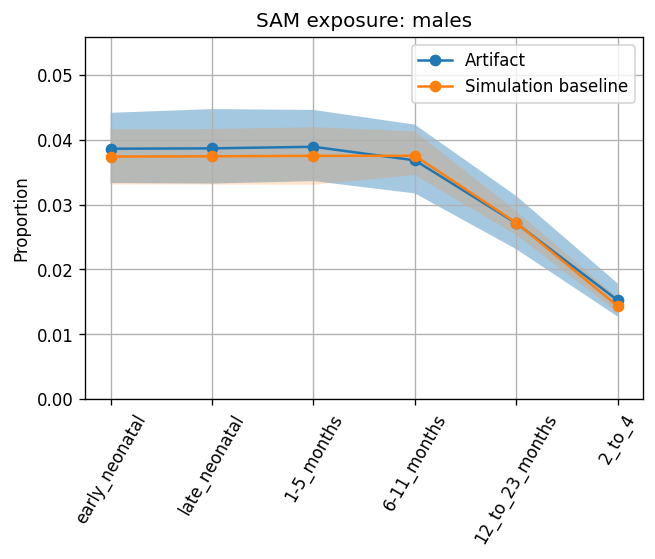

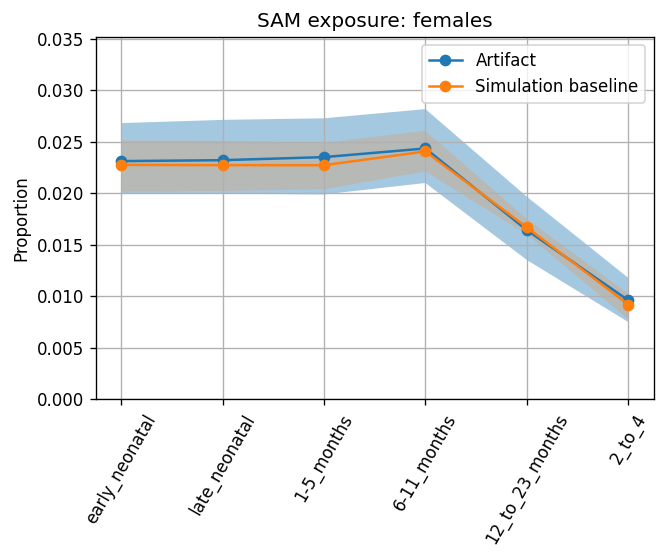

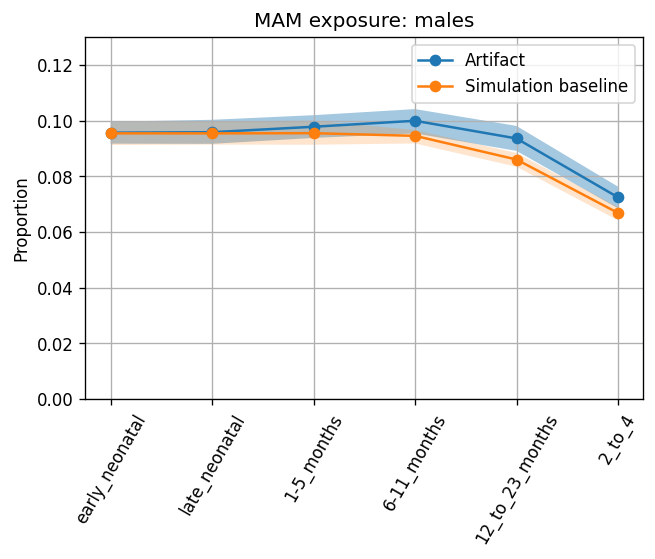

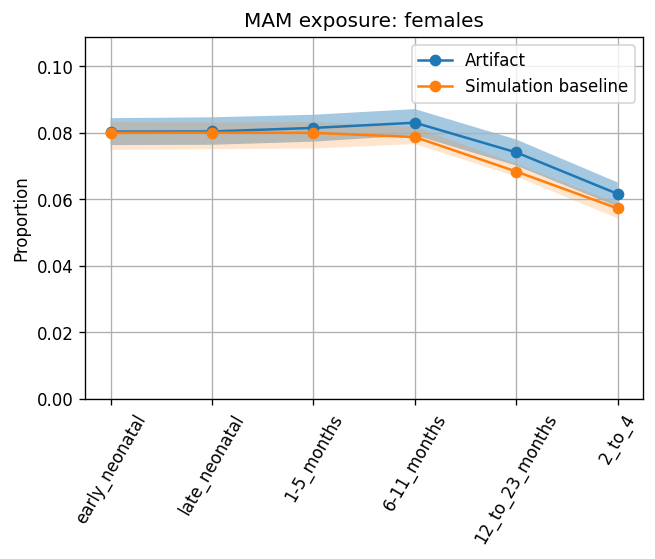

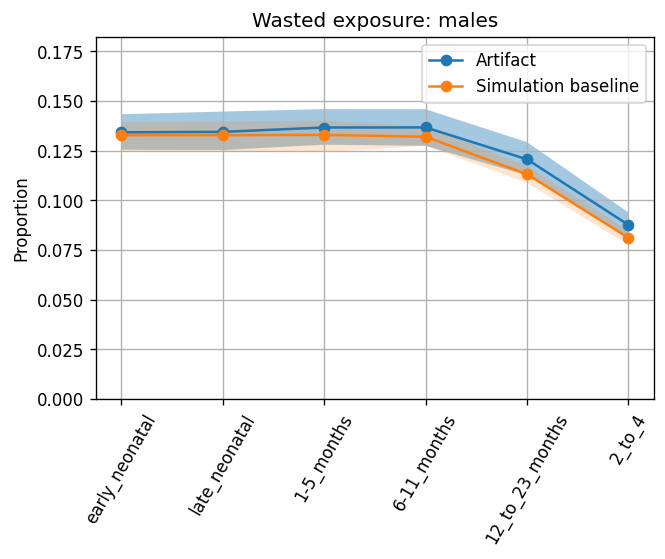

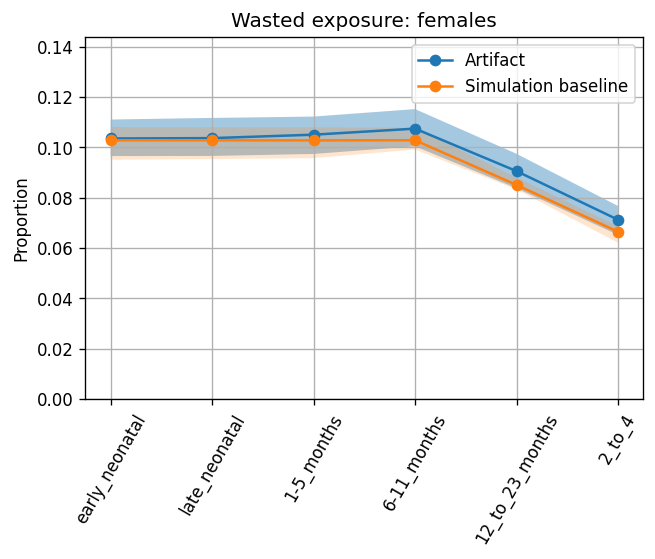

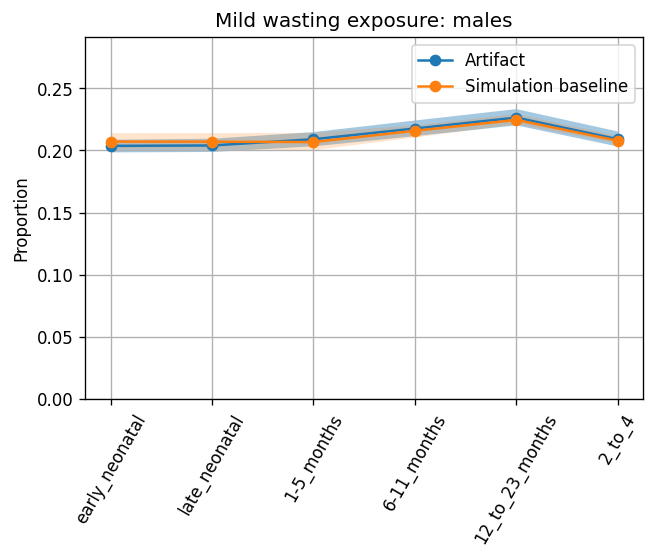

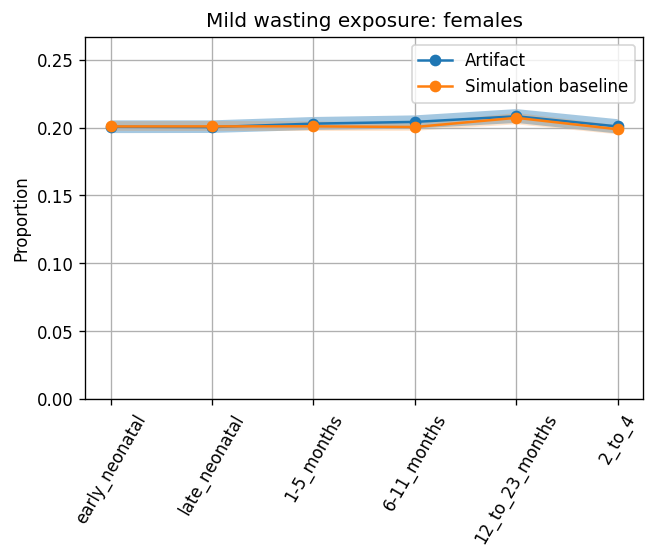

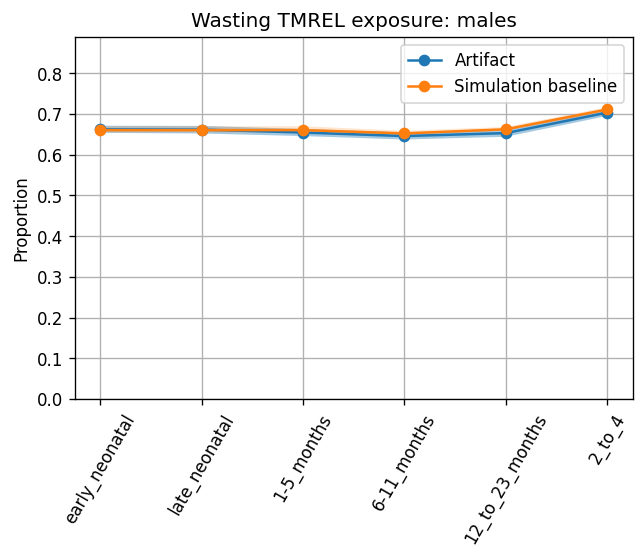

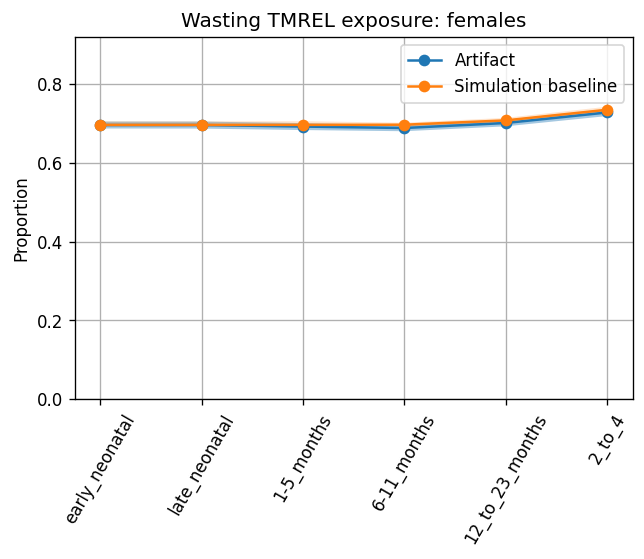

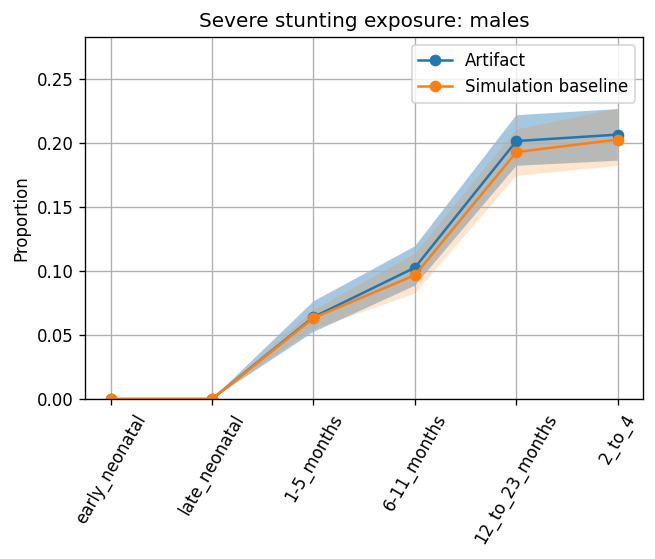

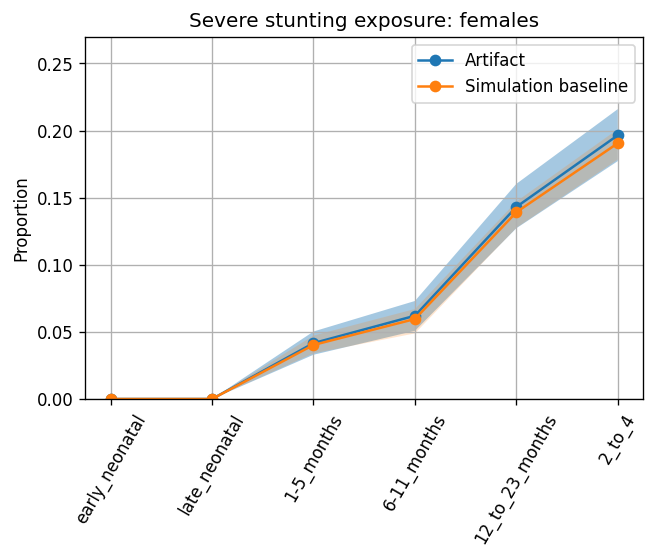

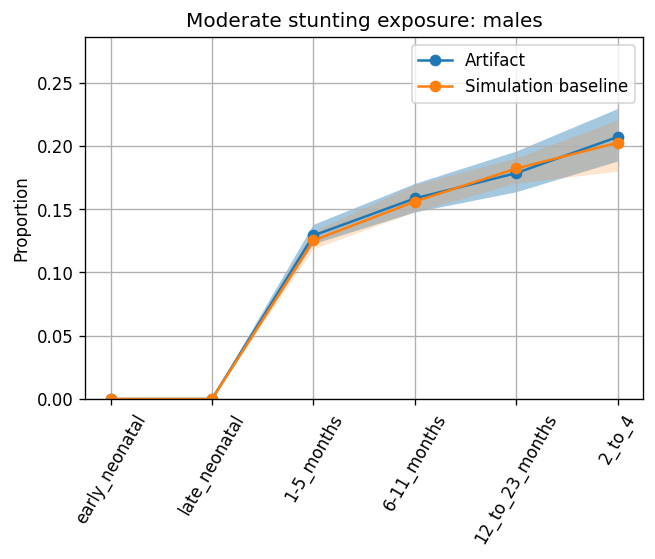

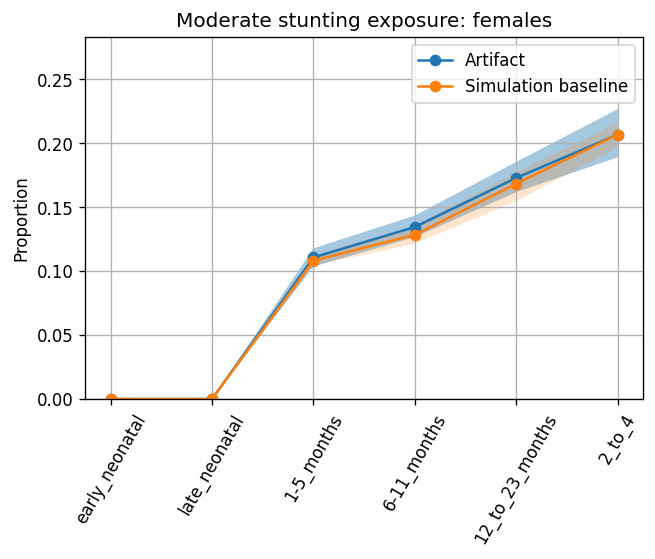

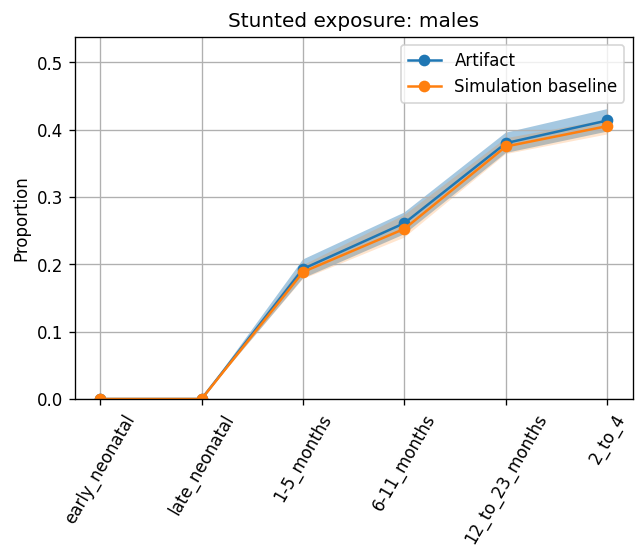

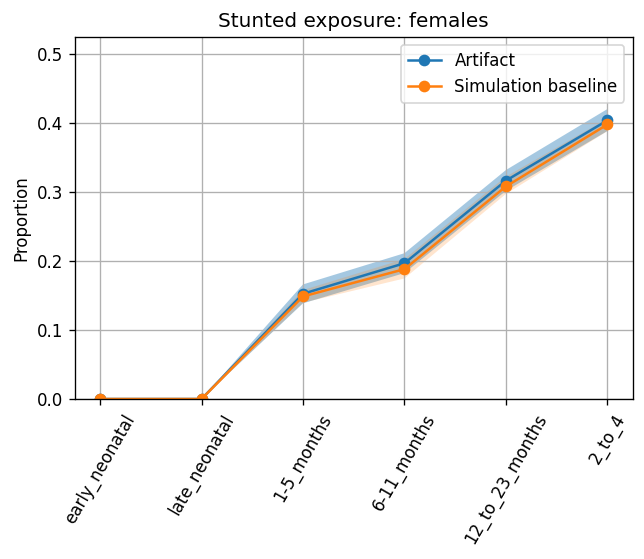

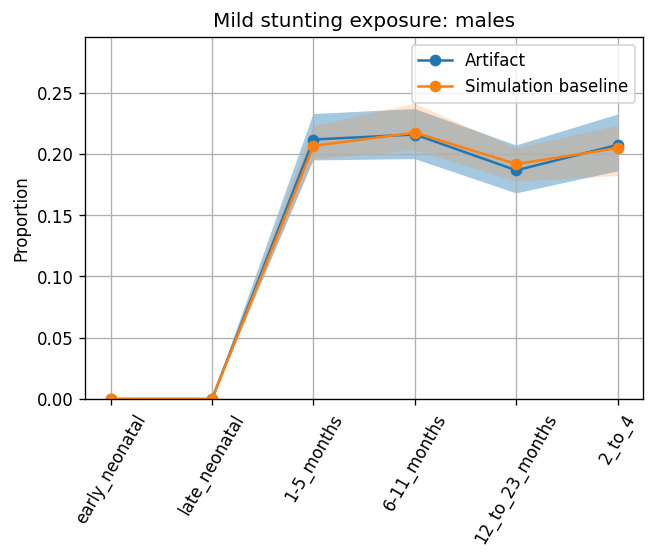

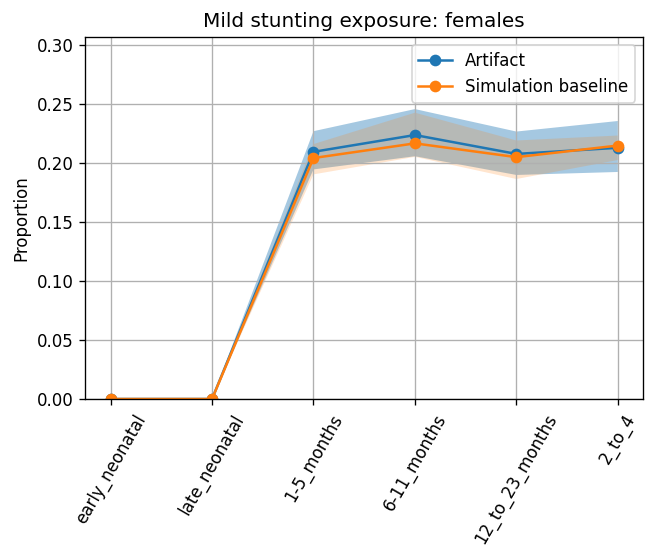

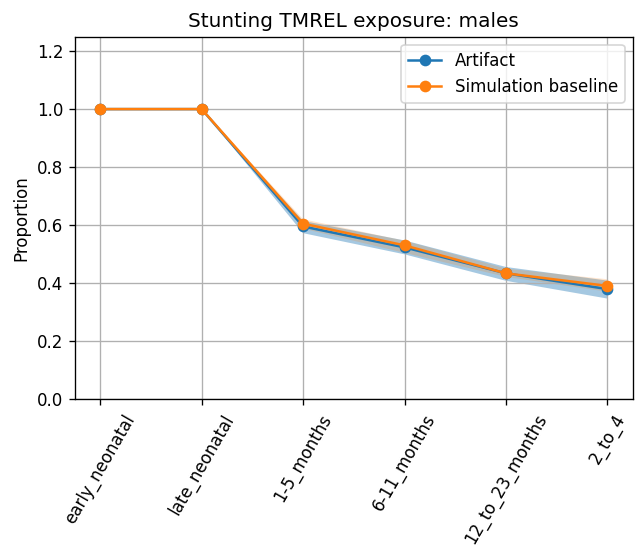

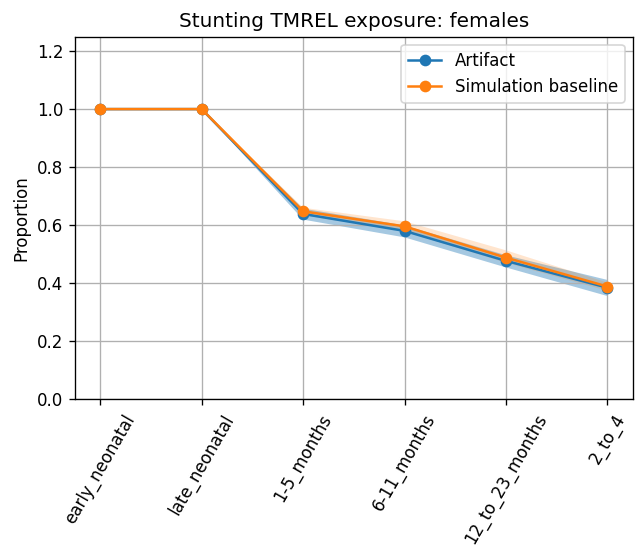

In [37]:
w_sim_cats = ['severe_acute_malnutrition','moderate_acute_malnutrition','wasted',
              'mild_child_wasting','susceptible_to_child_wasting']
s_sim_cats = ['cat1','cat2','stunted',
              'cat3','cat4']
art_cats = ['cat1','cat2','exposed','cat3','cat4']
w_title_cats = ['SAM','MAM','Wasted','Mild wasting','Wasting TMREL']
s_title_cats = ['Severe stunting','Moderate stunting','Stunted','Mild stunting','Stunting TMREL']

with PdfPages(f'plots/{figname}_exposure.pdf') as pdf:
    for i in list(range(0,len(art_cats))):
        for sex in ['male','female']:
            plot_cgf_exposure(wasting_prev, wasting_art, f'{sex}', art_cats[i],
                              w_sim_cats[i], w_title_cats[i])
            pdf.savefig(bbox_inches='tight')
    for i in list(range(0,len(art_cats))):
        for sex in ['male','female']:
            plot_cgf_exposure(stunting_prev, stunting_art, f'{sex}', 
                              art_cats[i], s_sim_cats[i], s_title_cats[i])
            pdf.savefig(bbox_inches='tight')

# Cause parameters

In [38]:
def load_artifact_cause_data(measure, cause):
    data = art.load(f'cause.{cause}.{measure}')
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    data['measure'] = measure
    data['cause'] = cause
    return data

In [39]:
artifact_data = pd.DataFrame()
causes=['all_causes','diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
measures=['prevalence','incidence_rate','remission_rate',
               'cause_specific_mortality_rate','excess_mortality_rate']
for cause in causes:    
    for measure in measures:
        try:
            temp = load_artifact_cause_data(measure, cause)
            artifact_data = pd.concat([artifact_data,temp], ignore_index=True)
        except:
            pass
artifact_data = artifact_data.sort_values(by='age_group')
artifact_data.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,age,age_group,measure,cause
0,female,0.0,0.019178,2020,2021,0.869707,0.700294,1.093357,early_neonatal,1,cause_specific_mortality_rate,all_causes
42,male,0.0,0.019178,2020,2021,104.357143,104.357143,104.357143,early_neonatal,1,remission_rate,diarrheal_diseases
48,female,0.0,0.019178,2020,2021,0.008350,0.004183,0.016337,early_neonatal,1,cause_specific_mortality_rate,diarrheal_diseases
54,male,0.0,0.019178,2020,2021,0.010762,0.005863,0.018621,early_neonatal,1,cause_specific_mortality_rate,diarrheal_diseases
192,female,0.0,0.019178,2020,2021,0.000000,0.000000,0.000000,early_neonatal,1,excess_mortality_rate,measles


In [40]:
# load GBD cause data
cause_ids = [302,341,322,294]
age_group_ids = [2,3,4,5]
sex_ids = [1,2]
location_id = 179

In [41]:
from db_queries import get_outputs

In [42]:
groupby_cols = ['input_draw','sex','age']

In [75]:
disease_pt = pd.read_csv(output_dir +'disease_state_person_time.csv')
dd_pt = pd.read_csv(output_dir + 'diarrhea_state_person_time.csv')
state_pt = pd.concat([disease_pt,dd_pt],ignore_index=True)

transitions = pd.read_csv(output_dir + 'disease_transition_count.csv')
dd_trans = pd.read_csv(output_dir + 'diarrhea_transition_count.csv')
transitions = pd.concat([transitions,dd_trans], ignore_index=True)

deaths = pd.read_csv(output_dir + 'deaths.csv')
deaths.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,wasting_state,age
0,0,female,2022,diarrheal_diseases,death,29,baseline,1.0,susceptible_to_child_wasting,early_neonatal
1,1,female,2022,diarrheal_diseases,death,29,baseline,0.0,mild_child_wasting,early_neonatal
2,2,female,2022,diarrheal_diseases,death,29,baseline,0.0,moderate_acute_malnutrition,early_neonatal
3,3,female,2022,diarrheal_diseases,death,29,baseline,1.0,severe_acute_malnutrition,early_neonatal
4,4,female,2022,diarrheal_diseases,death,29,baseline,3.0,susceptible_to_child_wasting,late_neonatal


In [66]:
def calculate_csmr():
    d = deaths.loc[deaths.scenario=='baseline']
    pem = d.loc[d.cause.str.contains('acute_malnutrition')]
    pem['cause'] = 'protein_energy_malnutrition'
    acmr = d.copy()
    acmr['cause'] = 'all_causes'
    d = pd.concat([d.loc[d.cause.isin(['diarrheal_diseases','lower_respiratory_infections','measles'])],
                  pem, acmr], ignore_index=True)
    d = d.groupby(groupby_cols + ['cause']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline']
          .groupby(groupby_cols).sum())
    d = ((d / pt)[['value']])
         #.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause'])
         #.describe(percentiles=[0.025,0.975]))
    return d

In [67]:
def calculate_transition_rates():
    trans = transitions.loc[transitions.scenario=='baseline']
    trans['cause'] = trans['measure'].str.split('to_', expand=True)[2].str.split('_event_count', expand=True)[0]
    trans['measure'] = np.where(trans.measure.str.contains('to_susceptible_to'),'remission','incidence')
    trans = trans.groupby(groupby_cols+['cause','measure']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline']
          .groupby(groupby_cols).sum())
    trans = (trans / pt)[['value']]
    trans = trans#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
    return trans

In [68]:
def calculate_prevalence(causes):
    s = state_pt.copy()
    s = s.loc[s.scenario=='baseline']
    prev = pd.DataFrame()
    for cause in causes:
        infected = state_pt.loc[state_pt.cause==cause].groupby(groupby_cols + ['cause']).sum()
        total = state_pt.loc[state_pt.cause.str.contains(cause)].groupby(groupby_cols).sum()
        temp = (infected / total)[['value']]#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
        prev = pd.concat([prev,temp])
    return prev

In [69]:
def calculate_child_growth_exposure_prevalence_by_draw(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(['input_draw','sex','age','cause']).sum()[['value']]
    prev = state_pt / state_pt.groupby(['input_draw','sex','age']).sum()
    #prev = prev.groupby(['sex','age','cause']).describe(percentiles=[0.025,0.975])
    return prev

In [76]:
csmr = calculate_csmr()
trans = calculate_transition_rates()
prev = calculate_prevalence(['diarrheal_diseases','measles','lower_respiratory_infections'])
pem_prev = calculate_child_growth_exposure_prevalence_by_draw('wasting').reset_index()
pem_prev = (pem_prev.loc[pem_prev.cause.str.contains('acute_malnutrition')]
            .groupby(['input_draw','sex','age']).sum().reset_index())
pem_prev['cause'] = 'protein_energy_malnutrition'
prev = pd.concat([prev.reset_index(), pem_prev], ignore_index=True).set_index(groupby_cols + ['cause'])
remission = trans / prev
emr = csmr / prev

prev=prev.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
trans=trans.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
remission=remission.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
emr=emr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
csmr=csmr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])

In [78]:
trans

value            \
                                                            count      mean   
sex    age           cause                        measure                     
female 1-5_months    diarrheal_diseases           incidence  12.0  2.720894   
                                                  remission  12.0  2.738745   
                     lower_respiratory_infections incidence  12.0  0.094556   
                                                  remission  12.0  0.091635   
                     measles                      incidence  12.0  0.019821   
...                                                           ...       ...   
male   late_neonatal diarrheal_diseases           remission  12.0  3.157425   
                     lower_respiratory_infections incidence  12.0  0.086452   
                                                  remission  12.0  0.061459   
                     measles                      incidence  12.0  0.000000   
                                                  remission  12.0  0.000000   

                                                                       \
                                                                  std   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  0.332606   
                                                  remission  0.324473   
                     lower_respiratory_infections incidence  0.010444   
                                                  remission  0.010279   
                     measles                      incidence  0.010246   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  0.247491   
                     lower_respiratory_infections incidence  0.011717   
                                                  remission  0.008500   
                     measles                      incidence  0.000000   
                                                  remission  0.000000   

                                                                       \
                                                                  min   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  2.159229   
                                                  remission  2.196401   
                     lower_respiratory_infections incidence  0.069648   
                                                  remission  0.066447   
                     measles                      incidence  0.007746   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  2.614219   
                     lower_respiratory_infections incidence  0.067303   
                                                  remission  0.046667   
                     measles                      incidence  0.000000   
                                                  remission  0.000000   

                                                                       \
                                                                 2.5%   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  2.241263   
                                                  remission  2.276703   
                     lower_respiratory_infections incidence  0.074372   
                                                  remission  0.071768   
                     measles                      incidence  0.007785   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  2.693868   
                     lower_respiratory_infections incidence  0.068845   
                                                  remission  0.047835   
                     measles   

In [77]:
def plot_cause_data(measure, cause, sex):
    
    a = artifact_data.loc[artifact_data.sex==sex].loc[artifact_data.measure==measure].loc[artifact_data.cause==cause]
    assert len(a)>0
    plt.figure(dpi=120)
    plt.plot(a['age'], a['mean'], marker='o', label='Artifact data')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.2)
    
    #g = gbd_data.loc[(gbd_data.sex==sex)
    #                &(gbd_data.cause==cause)
    #                &(gbd_data.measure==measure)]
    #plt.plot(g['age'], g['val'], marker='o', label='GBD data')
    #plt.fill_between(g['age'], g['lower'], g['upper'], alpha=0.2)
    
    if measure=='cause_specific_mortality_rate':
        sim_data = csmr.copy()
    elif measure=='prevalence':
        sim_data=prev.copy()
    elif measure=='incidence_rate':
        sim_data=trans.reset_index().loc[trans.reset_index().measure=='incidence']
    elif measure=='remission_rate':
        sim_data=remission.reset_index().loc[remission.reset_index().measure=='remission']
    elif measure=='excess_mortality_rate':
        sim_data = emr.copy()
    s = sim_data.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                     np.where(s.age=='late_neonatal', 1,
                             np.where(s.age=='1-5_months',2,
                                     np.where(s.age=='6-11_months',3,
                                             np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by=['order'])
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==cause]
    plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation baseline')
    plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    if cause=='all_causes':
        plt.semilogy()
    plt.grid()
    plt.xticks(rotation=60)
    plt.legend()
    cause_title = cause.replace('_',' ').capitalize()
    measure_title = measure.replace('_',' ')
    plt.title(f'{cause_title} {measure_title}\n{sex.capitalize()}s')

<ipython-input-77-b44566a201c4>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(dpi=120)


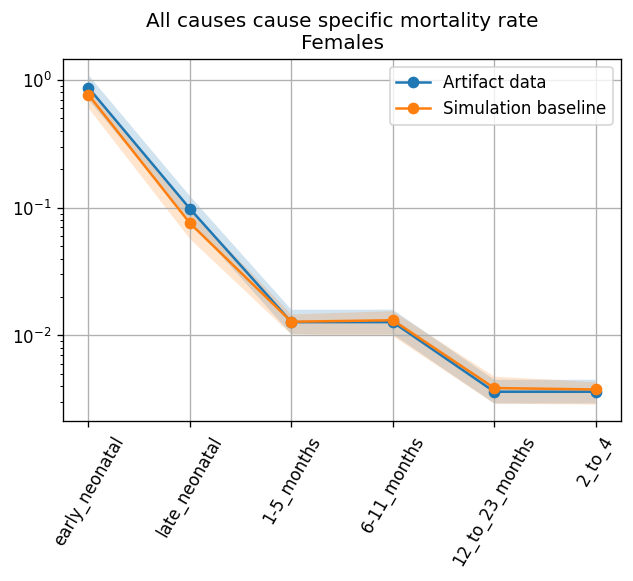

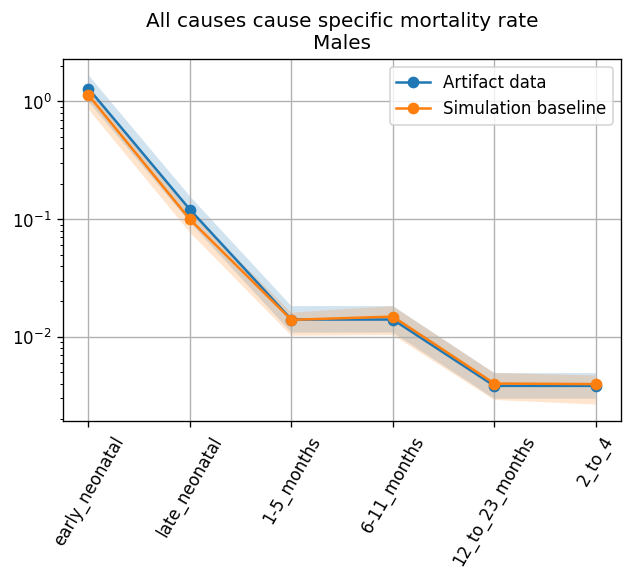

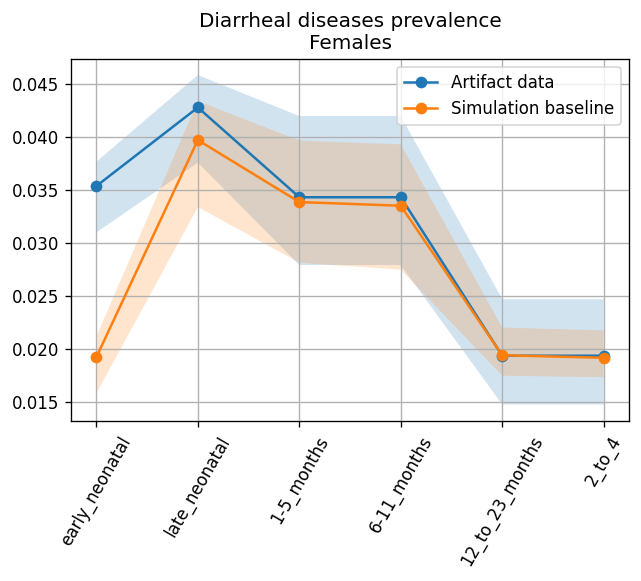

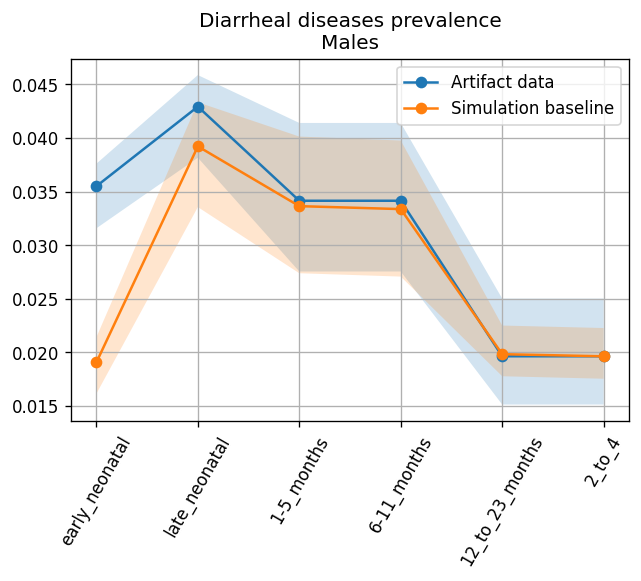

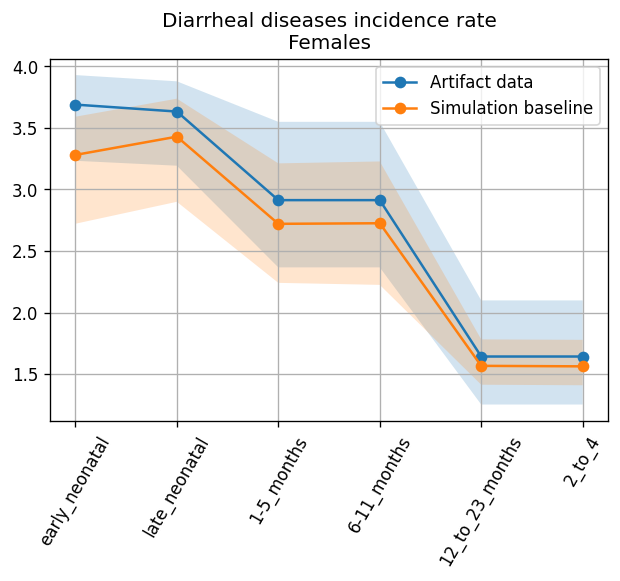

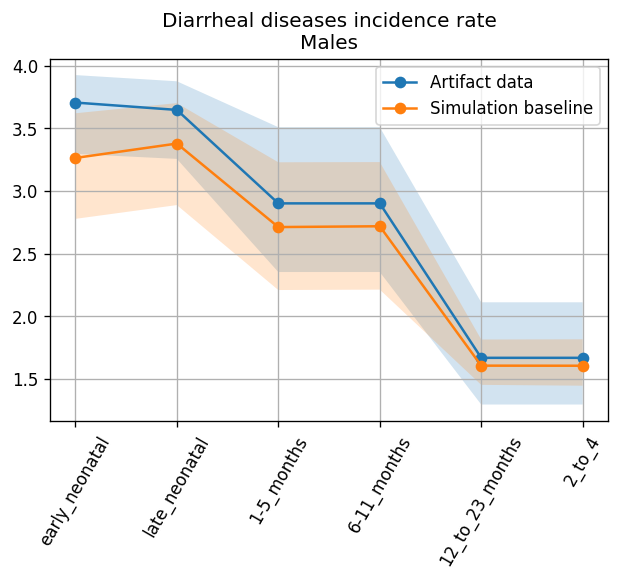

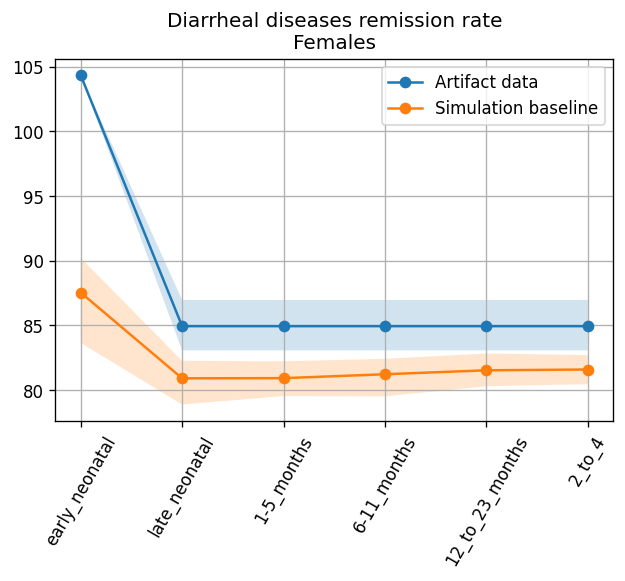

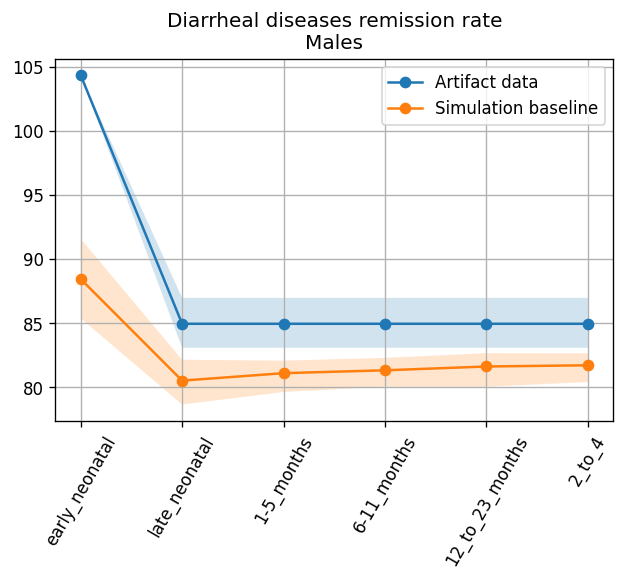

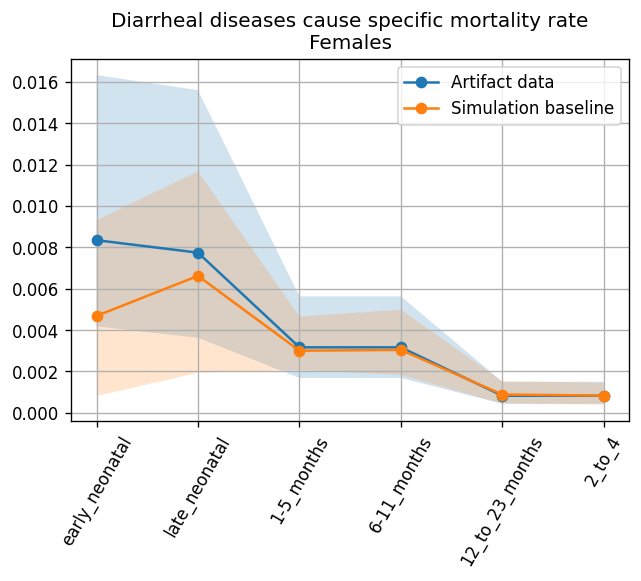

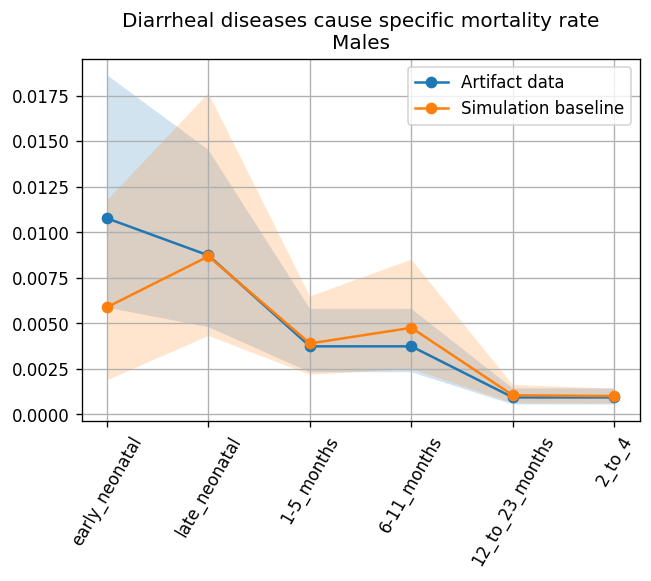

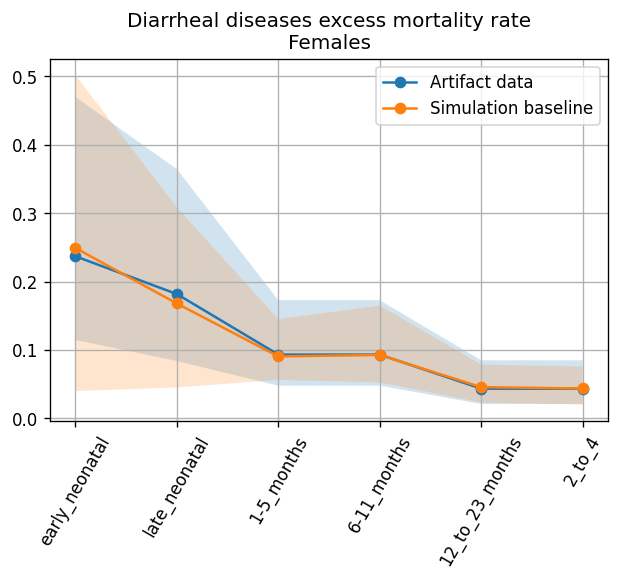

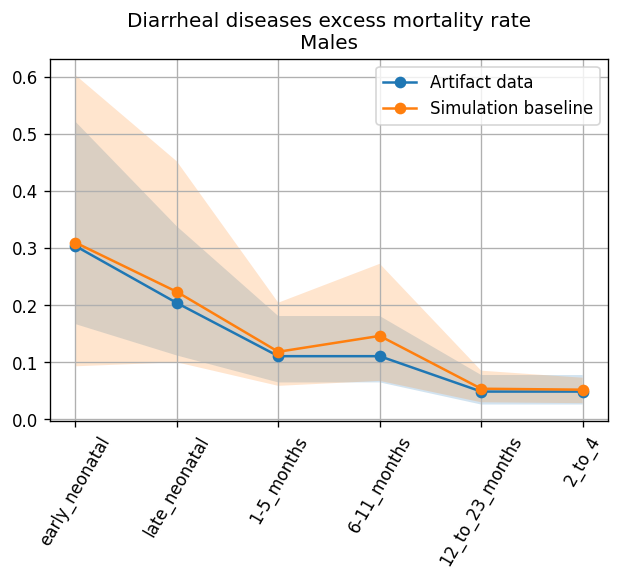

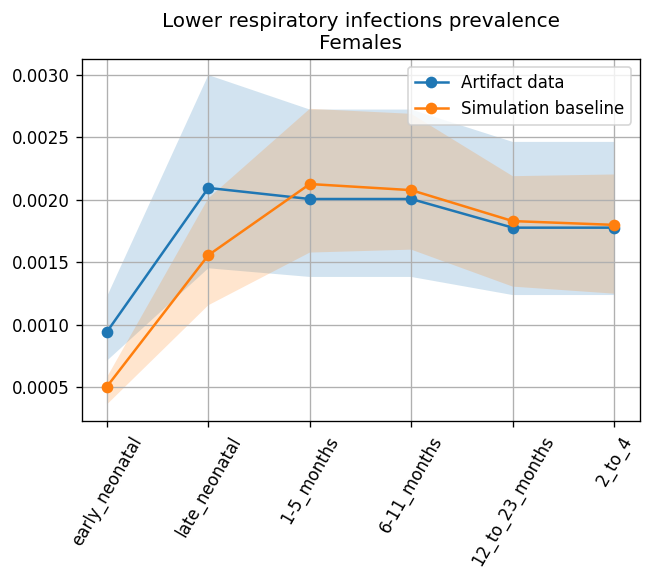

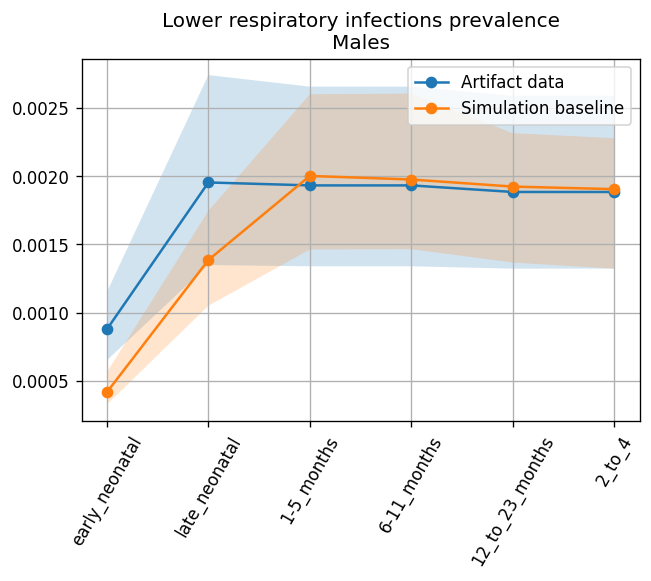

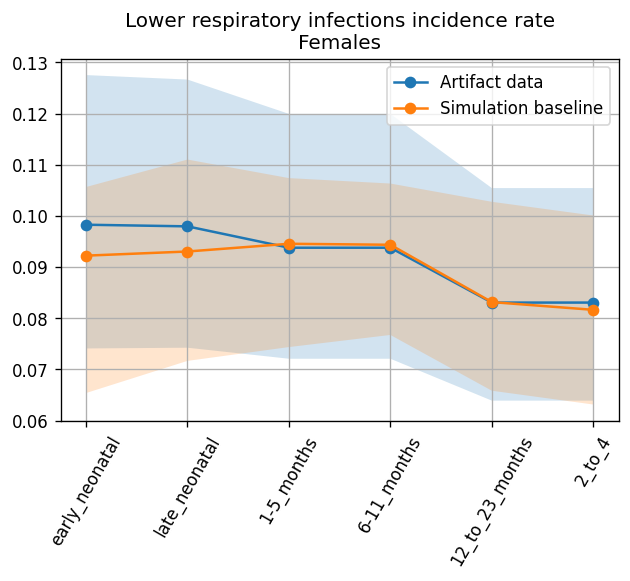

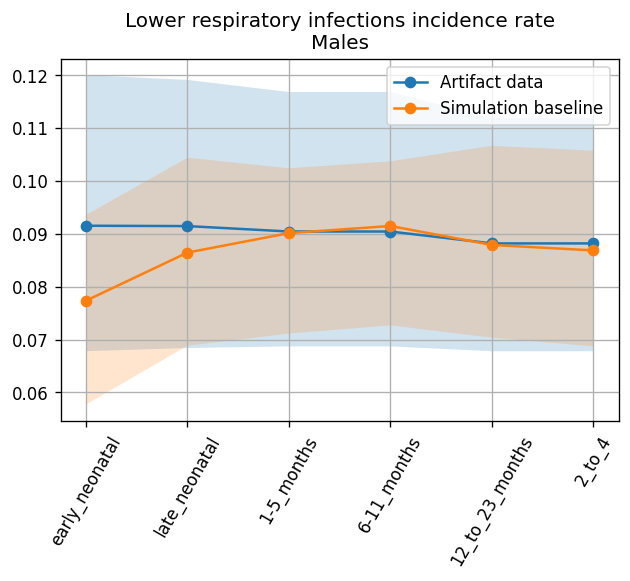

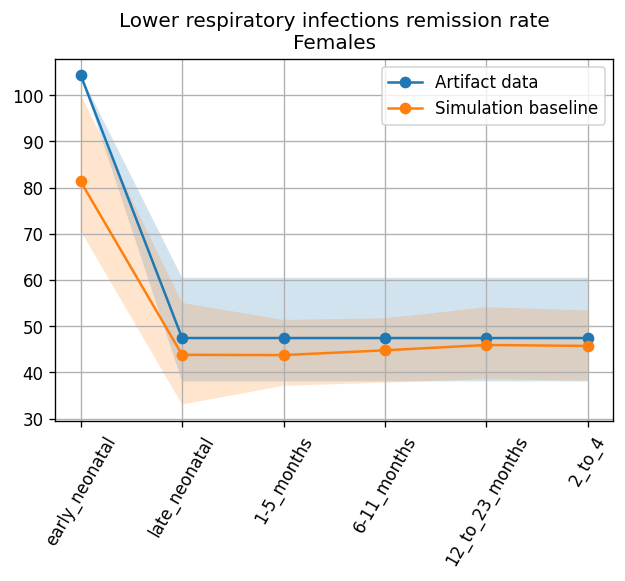

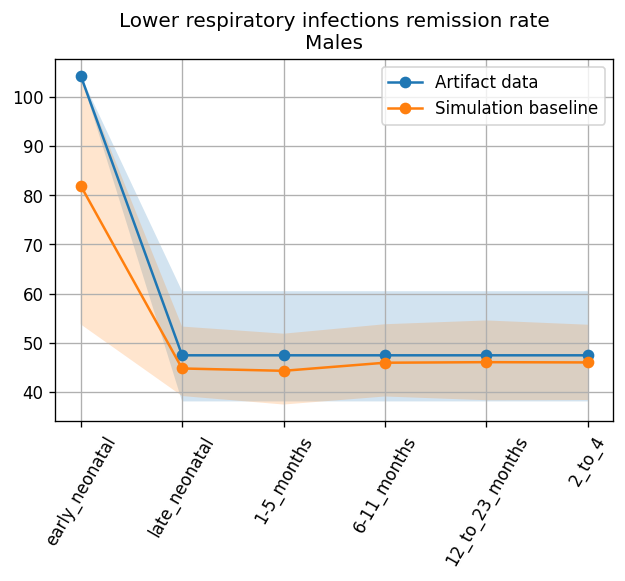

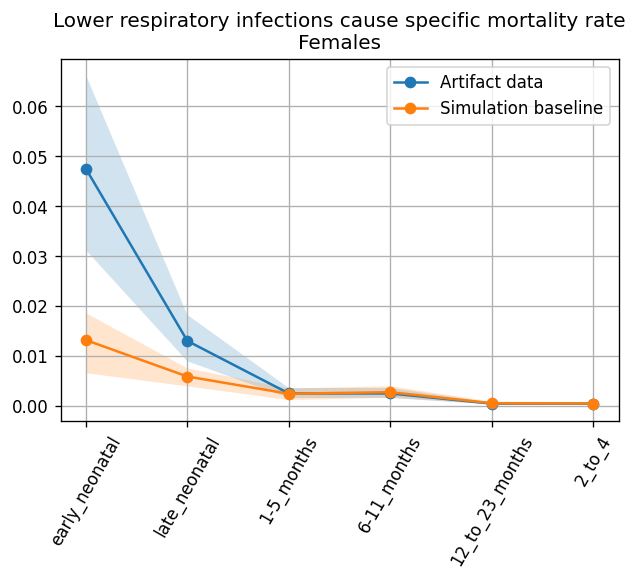

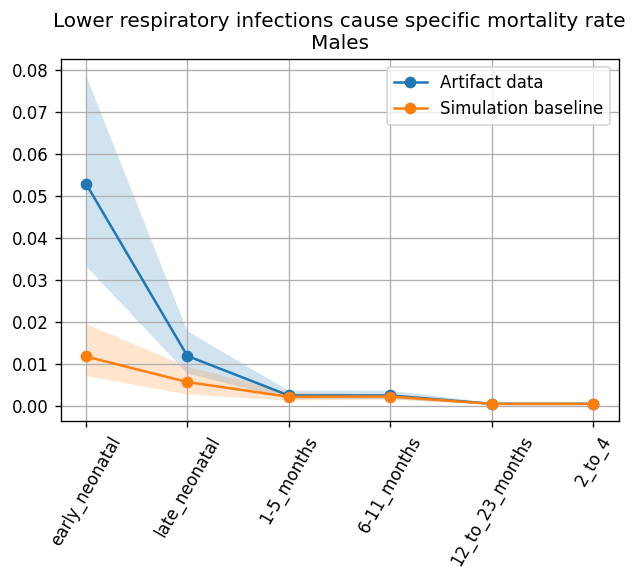

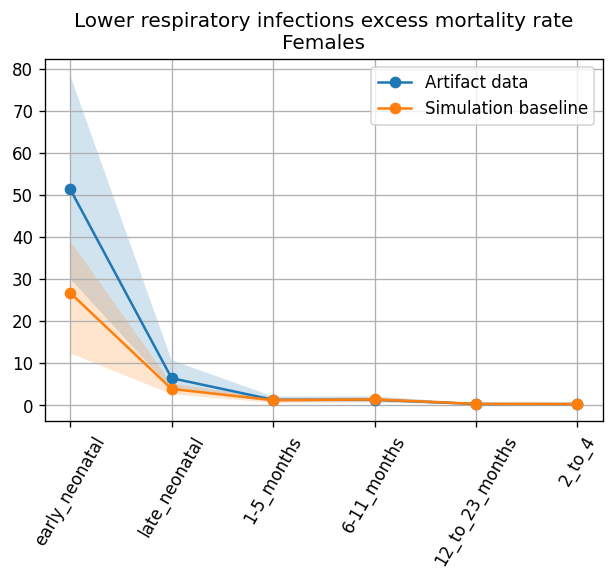

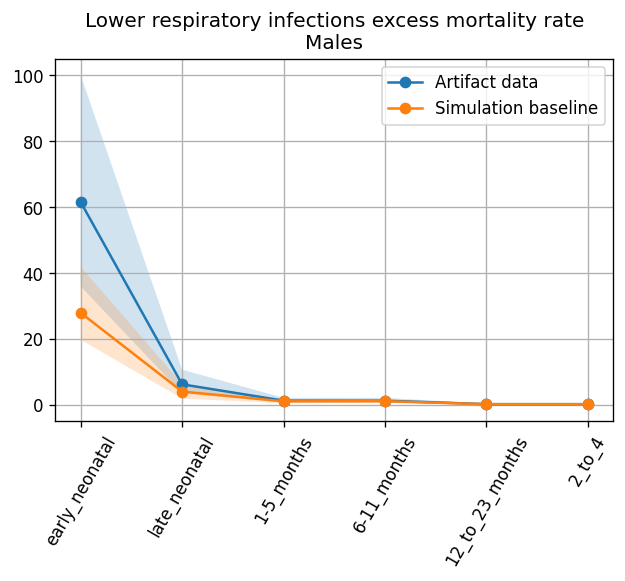

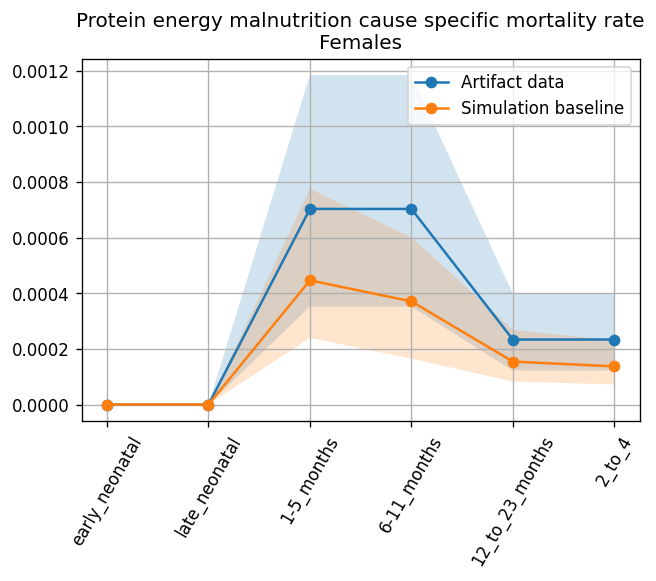

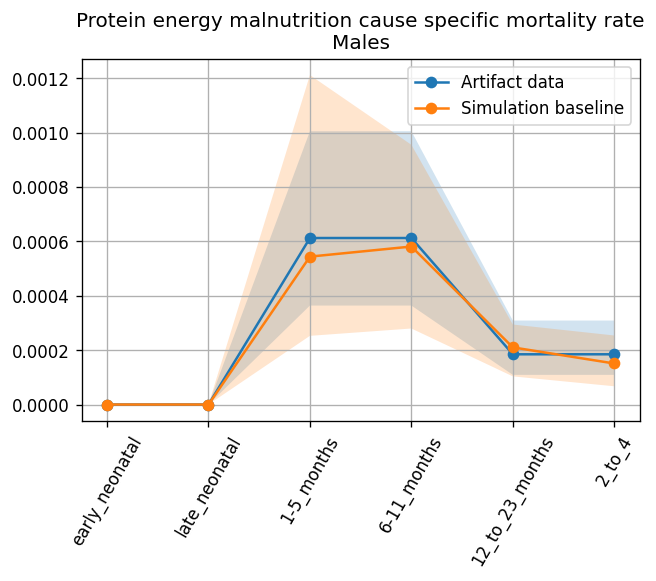

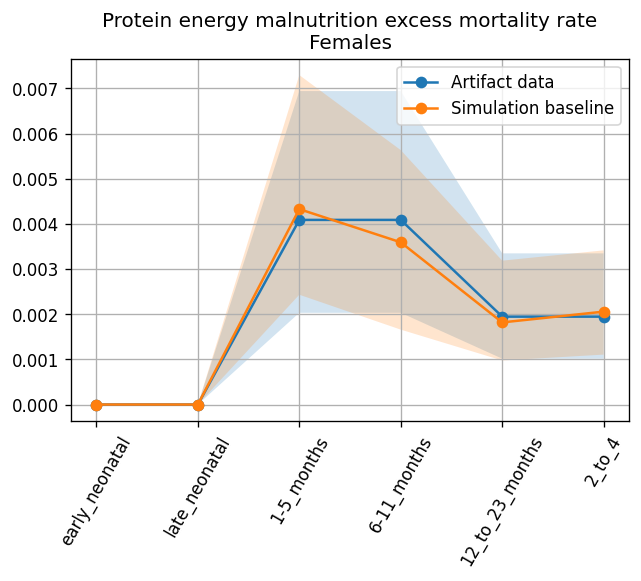

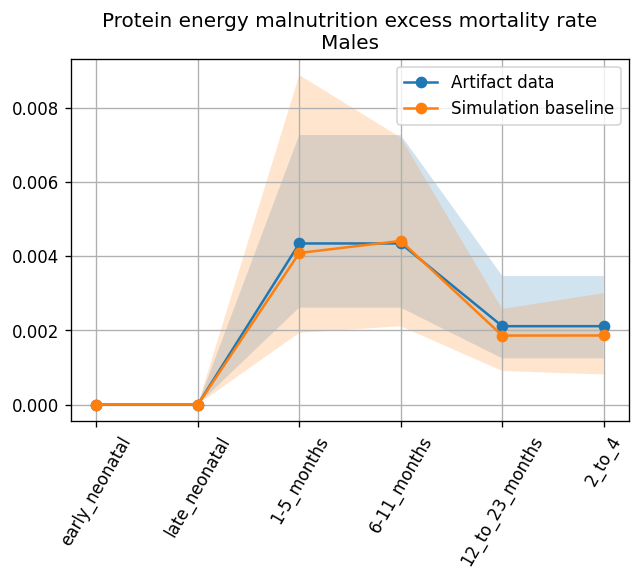

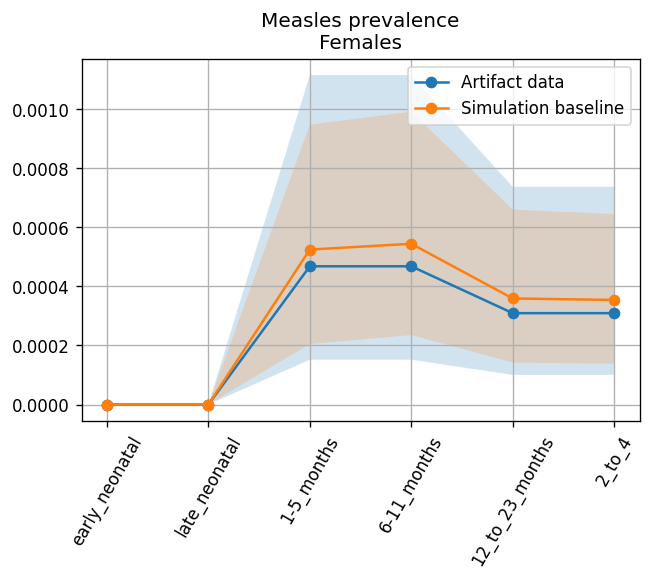

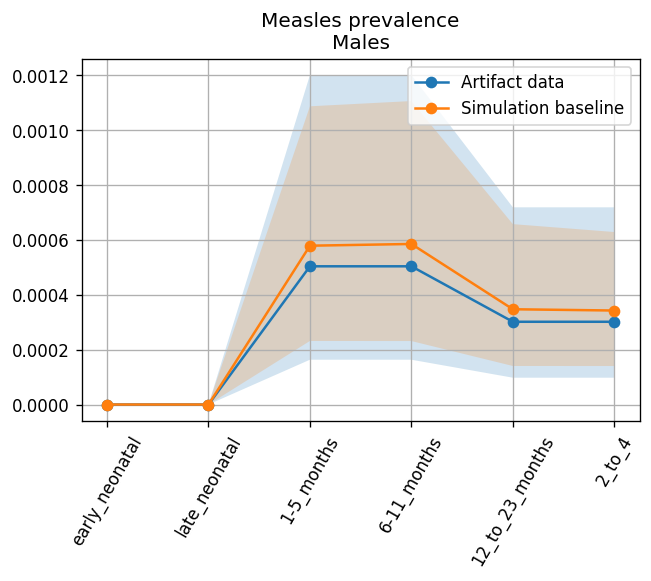

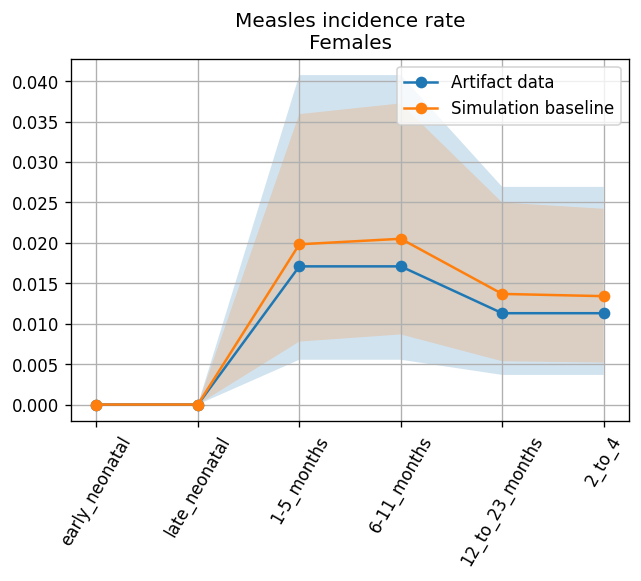

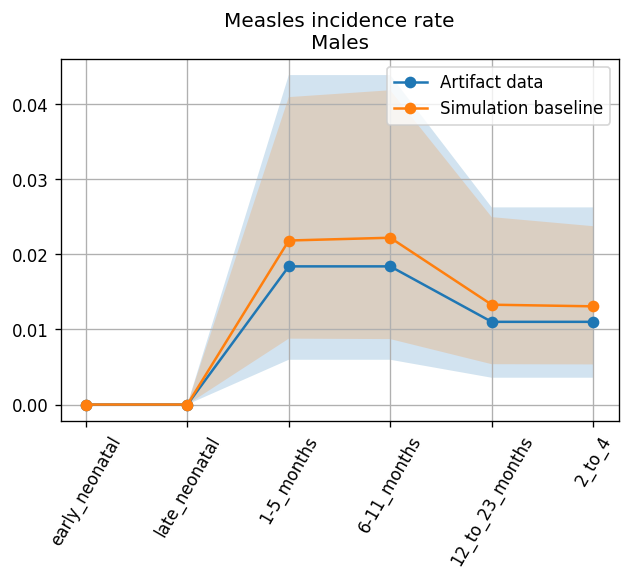

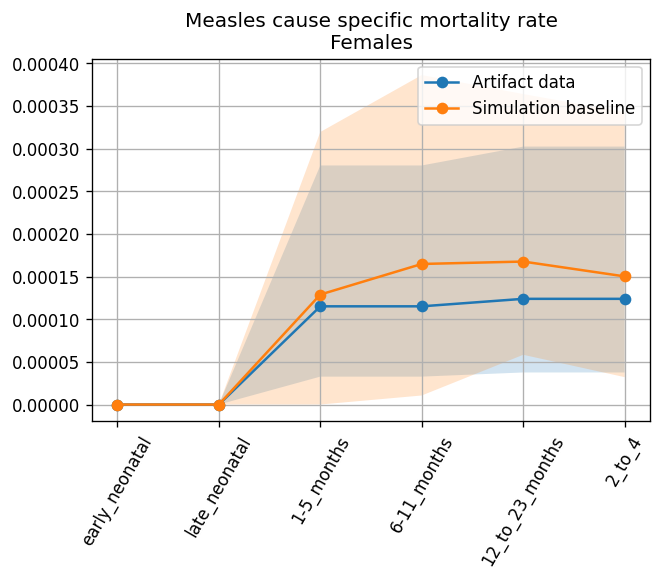

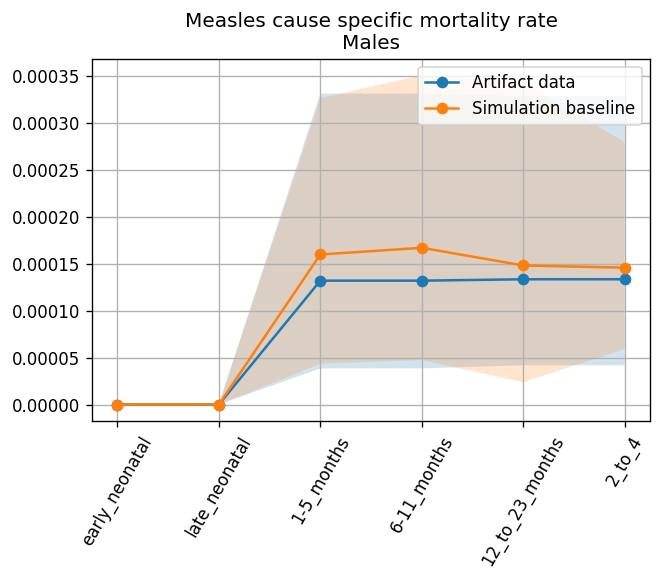

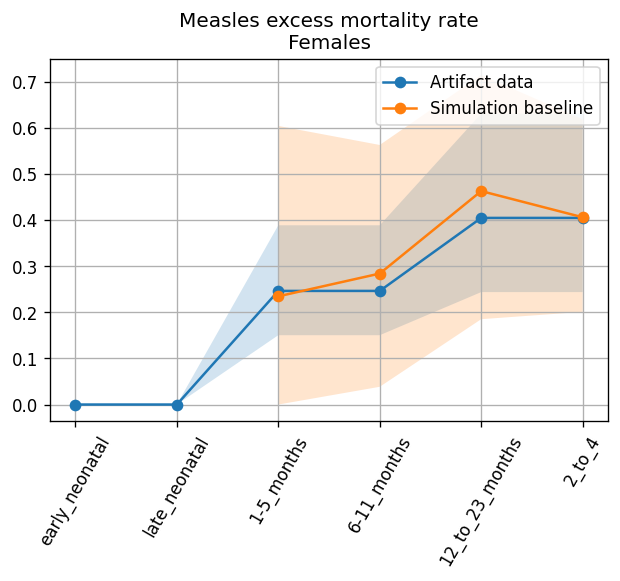

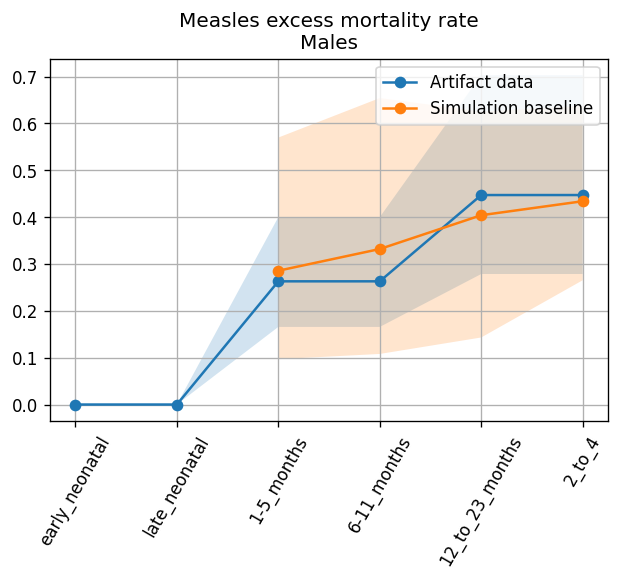

In [79]:
with PdfPages(f'plots/{figname}_cause_verification.pdf') as pdf:
    causes=['all_causes','diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
    measures=['prevalence','incidence_rate','remission_rate',
                   'cause_specific_mortality_rate','excess_mortality_rate']
    for cause in causes:
        for measure in measures:
            for sex in ['female','male']:
                try:
                    plot_cause_data(measure, cause, sex)
                    pdf.savefig(bbox_inches='tight')
                except:
                    pass